#Homework 1

The full PHMRC VA dataset can be found under the ```Files``` tab [here](http://ghdx.healthdata.org/record/ihme-data/population-health-metrics-research-consortium-gold-standard-verbal-autopsy-data-2005-2011).

The following blocks of code only download the data that will be processed programmatically, but it might be useful to download the other files and look at them manually to answer some of the questions.

In [76]:
# Download the Verbal Autopsy dataset
!curl -o VAAdult.csv https://ghdx.healthdata.org/sites/default/files/record-attached-files/IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.4M  100 21.4M    0     0  21.1M      0  0:00:01  0:00:01 --:--:-- 21.1M


# Problem 1: Getting Started with the Verbal Autopsy Dataset

In [77]:
import pandas as pd
import numpy as np

# Load the adult subset of the VA dataset into a pandas dataframe
df = pd.read_csv("/content/VAAdult.csv", header=0, dtype=object)

# Drop unnecessary columns from the dataframe
df = df[df.columns.drop(list(df.filter(regex='word_.*')))]

# View the first 10 rows of the dataset
df.head(10)

,site,module,gs_code34,gs_text34,va34,gs_code46,gs_text46,va46,gs_code55,gs_text55,...,a6_07d,a6_07m,a6_07y,a6_09,a6_10,a7_11,a7_12,a7_13,a7_14,newid
0,Mexico,Adult,K71,Cirrhosis,6,K71,Cirrhosis,8,K71,Cirrhosis,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,1
1,AP,Adult,G40,Epilepsy,12,G40,Epilepsy,16,G40,Epilepsy,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,2
2,AP,Adult,J12,Pneumonia,26,J12,Pneumonia,37,J12,Pneumonia,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,3
3,Mexico,Adult,J33,COPD,8,J33,COPD,10,J33,COPD,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,4
4,UP,Adult,I21,Acute Myocardial Infarction,17,I21,Acute Myocardial Infarction,23,I21,Acute Myocardial Infarction,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,5
5,UP,Adult,X09,Fires,15,X09,Fires,19,X09,Fires,...,Don't Know,Don't Know,Don't Know,No,No,NaN,NaN,NaN,NaN,6
6,Dar,Adult,N17,Renal Failure,29,N17,Renal Failure,40,N17,Renal Failure,...,Don't Know,Don't Know,Don't Know,No,No,NaN,NaN,NaN,NaN,7
7,Dar,Adult,B20,AIDS,1,C30,AIDS with TB,2,C30,AIDS with TB,...,Don't Know,Don't Know,Don't Know,No,No,NaN,NaN,NaN,NaN,8
8,Bohol,Adult,C34,Lung Cancer,19,C34,Lung Cancer,27,C34,Lung Cancer,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,9
9,UP,Adult,O67,Maternal,21,S85,Sepsis,42,S85,Sepsis,...,Don't Know,Don't Know,Don't Know,Yes,No,NaN,NaN,NaN,NaN,10


In [78]:
# Preprocessing the data
df = df.replace("Don't Know", np.nan)

In [79]:
df.columns

Index(['site', 'module', 'gs_code34', 'gs_text34', 'va34', 'gs_code46',
       'gs_text46', 'va46', 'gs_code55', 'gs_text55',
       ...
       'a6_07d', 'a6_07m', 'a6_07y', 'a6_09', 'a6_10', 'a7_11', 'a7_12',
       'a7_13', 'a7_14', 'newid'],
      dtype='object', length=267)

You will need to query the dataset to obtain the answers to this problem.

The following blocks of code guide you through that process step by step.

In [80]:
# a)
# Q: Give a brief summary of the decedent’s demographics (sex, age, marital
# status, last known level of education completed) at the time they died
# Which columns in the dataset would you query to answer this question?
# Find and look through the PHMRC codebook on the data site to choose
# the correct codes
# # --- YOUR CODE HERE ---
#columns to be queried are as below
# g1_05 - sex of deceased
# g1_08 - marital status of deceased
# g1_09 - last known level of education completed
# g1_07a - last known age of deceased year
# g1_07b - last known age of deceased month
# g1_07c - last known age of deceased day
cols = ['g1_05','g1_07a','g1_08','g1_09']

# Sex: Indicates the gender of the deceased.
# Age: Indicates the age of the deceased at the time of death.
# Marital Status: Indicates the marital status of the deceased at the time of death.
# Education Level: Indicates the last known level of education completed by the deceased.

#keywords = ['sex','age','marital status','last known level of education']
# --- YOUR CODE ENDS ---

# The following line filters the dataset to only the rows where the decedent ID
# is 1091 (one row), and returns the values in the columns specified in cols
# --- YOUR CODE HERE ---
df.loc[df["newid"]=="1091"][cols]
# --- YOUR CODE ENDS ---
# Column codes for gender or sex of the decedent.
# Column codes for age at the time of death.
# Column codes for marital status.
# Column codes for the last known level of education completed.

,g1_05,g1_07a,g1_08,g1_09
1090,Male,42,Married,High School


cols = ['g1_05','gl_07a','g1_08','g1_09']

Sex: Indicates the gender of the deceased.

Age: Indicates the age of the deceased at the time of death.

Marital Status: Indicates the marital status of the deceased at the time of death.

Education Level: Indicates the last known level of education completed by the deceased.

In [81]:
# b)
# Q: For how long had the patient reportedly felt “ill” before they were
# pronounced dead?
# How would you query the dataset to obtain the answer to this part?
# Hint: The codebook does not always match up with column names in the data,
# but it can provide useful clues as to the meanings of some column names in
# the data. This may be the case for multiple problems.

# ----------------------- YOUR CODE HERE ---------------------------------------

# variable	question
# 997	c1_21a	How long did the illness last? [specify units]
# 998	c1_21b	How long did the illness last?
#lets consider a2_01 For how long was [name] ill before s/he died? [specify units]
illness_duration = df[['a2_01']]
available_data_count = illness_duration.count()
illness_duration.head(), available_data_count

# Displaying a subset of the filtered codebook to better identify the relevant variables
codebook = pd.read_excel("/content/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx")
codebook.head()
codebook[['variable', 'question']].drop_duplicates()
keywords = ['illness', 'duration', 'time', 'days', 'months', 'years']
filtered_codebook = codebook[codebook['question'].str.contains('|'.join(keywords), case=False, na=False)]
filtered_columns = filtered_codebook['variable'].tolist()
existing_columns = [col for col in filtered_columns if col in df.columns]
existing_columns
# --- YOUR CODE ENDS ---

['g1_07a',
 'g1_07b',
 'g1_07c',
 'g1_10',
 'g2_03bd',
 'g2_03bm',
 'g2_03by',
 'g2_03cd',
 'g2_03cm',
 'g2_03cy',
 'g5_04a',
 'g5_04b',
 'g5_04c',
 'g5_06b',
 'a2_18',
 'a2_78',
 'a2_81',
 'a3_07',
 'a3_10',
 'a6_01']

In [82]:
illness_duration = df[['a2_01']]
available_data_count = illness_duration.count()
illness_duration.head(), available_data_count


(  a2_01
 0    30
 1     1
 2    60
 3    30
 4    60,
 a2_01    7841
 dtype: int64)

In [83]:
# Adding other relevant columns to the illness_duration DataFrame
additional_columns = ['g1_07a', 'g1_07b', 'g1_07c', 'g1_10', 'g2_03bd', 'g2_03bm', 'g2_03by',
                      'g2_03cd', 'g2_03cm', 'g2_03cy', 'g5_04a', 'g5_04b', 'g5_04c', 'g5_06b',
                      'a2_18', 'a2_78', 'a2_81', 'a3_07', 'a3_10', 'a6_01']

illness_duration = df[['a2_01'] + additional_columns]

# Displaying the first few rows of the updated illness_duration DataFrame
illness_duration.head()

,a2_01,g1_07a,g1_07b,g1_07c,g1_10,g2_03bd,g2_03bm,g2_03by,g2_03cd,g2_03cm,...,g5_04a,g5_04b,g5_04c,g5_06b,a2_18,a2_78,a2_81,a3_07,a3_10,a6_01
0,30,51,NaN,NaN,NaN,2,February,2010,NaN,NaN,...,51,NaN,NaN,NaN,Yes,Yes,No,No,No,Yes
1,1,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,NaN,NaN,0,No,No,No,No,No,Yes
2,60,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62,NaN,NaN,0,Yes,No,No,No,No,Yes
3,30,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80,NaN,NaN,0,No,No,Yes,No,No,Yes
4,60,76,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,76,NaN,NaN,12,No,No,No,No,No,Yes


In [84]:
illness_duration.count()

a2_01      7841
g1_07a     7718
g1_07b        0
g1_07c        0
g1_10      4216
g2_03bd     932
g2_03bm     932
g2_03by     932
g2_03cd     300
g2_03cm     300
g2_03cy     300
g5_04a     7704
g5_04b        0
g5_04c        2
g5_06b     7803
a2_18      7787
a2_78      7791
a2_81      7804
a3_07      7615
a3_10      7838
a6_01      7839
dtype: int64

In [85]:
#calculating mean and median for checking how long the patient was ill before dying
df['a2_01'] = pd.to_numeric(df['a2_01'], errors='coerce')
mean_illness_duration = df['a2_01'].mean()
median_illness_duration = df['a2_01'].median()

mean_illness_duration, median_illness_duration

(151.53373294222675, 30.0)

Answer B. Half of the patients were ill for 30 days or less before they died, while the average duration of illness, affected by longer durations (possible outliers), is approximately 151.53 days.

In [86]:
# c)
# Q: How did the patient die?
# Hint: The codebook does not always match up with column names in the data,
# but it can provide useful clues as to the meanings of some column names in
# the data.
# --- YOUR CODE HERE ---
keywords = ['cause of death', 'diagnosis', 'disease']
cause_of_death_columns = codebook[codebook['question'].str.contains('|'.join(keywords), case=False, na=False)]
cause_of_death_column_names = cause_of_death_columns['variable'].tolist()
existing_cause_of_death_columns = [col for col in cause_of_death_column_names if col in df.columns]
cause_of_death_data = df[existing_cause_of_death_columns]
cause_of_death_data.head(), existing_cause_of_death_columns
# --- YOUR CODE ENDS ---

(     gs_level a1_01_9
 0  GS Level 2     NaN
 1  GS Level 1     Yes
 2  GS Level 1      No
 3  GS Level 1      No
 4  GS Level 1     Yes,
 ['gs_level', 'a1_01_9'])

In [87]:
cause_of_death_descriptions = codebook[codebook['variable'].isin(existing_cause_of_death_columns)]
cause_of_death_descriptions[['variable', 'question']]

,variable,question
5,gs_level,Gold Standard Diagnosis Level
71,a1_01_9,Did Decedent Have Heart Disease?


In [88]:
gs_level_distribution = cause_of_death_data['gs_level'].value_counts(normalize=True) * 100  # Getting the percentage distribution
heart_disease_counts = cause_of_death_data['a1_01_9'].value_counts(normalize=True) * 100
gs_level_distribution, heart_disease_counts

(GS Level 1     86.208658
 GS Level 2     13.140084
 GS Level 2B     0.651258
 Name: gs_level, dtype: float64,
 No                   84.668133
 Yes                  15.280114
 Refused to Answer     0.051753
 Name: a1_01_9, dtype: float64)

1. Gold Standard Diagnosis Level Distribution:



*   GS Level 1: 86.21% - The majority of the patients fall under this diagnosis level.
*   GS Level 2: 13.14%


*   GS Level 2B: 0.65%


2. Prevalence of Heart Disease Among Deceased:

*   Yes:  15.28% - This percentage of patients had heart disease.
*   No:  84.67% - The majority of patients did not have heart disease.

*   Refused to Answer: 0.05%










In [89]:
death_keywords = ['location','place','cause','disease','condition','treatment','intervention']
death_details_columns = codebook[codebook['question'].str.contains('|'.join(death_keywords), case=False, na=False)]
death_details_column_names = death_details_columns['variable'].tolist() #extracting col names
existing_death_details_columns = [col for col in death_details_column_names if col in df.columns]
death_details_data = df[existing_death_details_columns]
print(death_details_data.head())


  gs_comorbid1 gs_comorbid2 a1_01_9 a2_09_1b a2_09_2b a3_03
0          NaN          NaN     NaN      NaN      NaN    No
1          NaN          NaN     Yes      NaN      NaN    No
2          NaN          NaN      No      NaN      NaN   Yes
3          E10          NaN      No      NaN      NaN   Yes
4          NaN          NaN     Yes      NaN      NaN    No


In [90]:
# Q: Provide some details surrounding their death
# --- YOUR CODE HERE ---
#gs_comorbid1, gs_comorbid2, a1_01_9, a2_09_1b, a2_09_2b, a3_03
columns_death = ['gs_comorbid1', 'gs_comorbid2', 'a1_01_9', 'a2_09_1b', 'a2_09_2b', 'a3_03']
death_details_data = df[columns_death]
death_details_summary = {column: death_details_data[column].value_counts() for column in columns_death}
death_details_summary
# --- YOUR CODE ENDS ---

{'gs_comorbid1': E10    605
 I10    146
 Name: gs_comorbid1, dtype: int64,
 'gs_comorbid2': I10    817
 E10      4
 Name: gs_comorbid2, dtype: int64,
 'a1_01_9': No                   6544
 Yes                  1181
 Refused to Answer       4
 Name: a1_01_9, dtype: int64,
 'a2_09_1b': NECK                                           3
 neck                                           2
 LEG                                            2
 STOMACH.                                       2
 HEAD                                           2
 abdomen                                        2
 BUTTOCKS                                       2
 FEET                                           2
 THORAX, ARMS AND NECK                          1
 LEFT SIDE OF NECK                              1
 BETWEEN THE LEGS, ARMPITS, BEHIND THE KNEES    1
 ONLY HANDS, CHEST & NECK                       1
 THIGH, BACK                                    1
 on the nake                                    1
 hands and lags 

Comorbid Conditions : Patients with type 1 diabetes millitus and essential hypertension should be considered in the context of overall health.

Heart Disease : Potential focus of understanding causes of death and preventive measures. 1181 patients have heart disease and majority didnt had.

Menopause Status: The data on menopause can be used to understand the demographic distribution of female patients and analyze causes of death in different age groups.

Rash Locations: The diversity in rash locations can be correlated with specific diseases or health conditions to provide insights into possible illnesses preceding death.



Index(['g1_01m', 'g1_01y', 'g1_05', 'g1_06m', 'g1_06y', 'g1_07a', 'g1_07b',
       'g1_08', 'g1_09', 'g1_10',
       ...
       'a6_02_9', 'a6_02_10', 'a6_02_11', 'a6_02_12a', 'a6_02_13', 'a6_02_14',
       'a6_02_15', 'a6_04', 'a6_05', 'a6_09'],
      dtype='object', length=214)

In [92]:
# Q: How many causes of death are there across the entire dataset?
unique_causes_of_death = df['gs_text34'].nunique()
sample_causes_of_death = df['gs_text34'].unique()[:10]  # Getting the first 10 unique causes as a sample
unique_causes_of_death, sample_causes_of_death

(34,
 array(['Cirrhosis', 'Epilepsy', 'Pneumonia', 'COPD',
        'Acute Myocardial Infarction', 'Fires', 'Renal Failure', 'AIDS',
        'Lung Cancer', 'Maternal'], dtype=object))

In [95]:
# Q: How many causes of death are there across the entire dataset?
# --- YOUR CODE HERE ---
unique_causes_of_death = df['gs_text34'].nunique()
sample_causes_of_death = df['gs_text34'].unique()[:10]  # Getting the first 10 unique causes as a sample
# --- YOUR CODE ENDS ---

# How do you obtain a list of unique elements from the previous column?
# Hint: the numpy library might be useful here
# --- YOUR CODE HERE ---
unique_elements = df['gs_text34'].unique()
# --- YOUR CODE ENDS ---

# How do you count the number of elements in the previous list?
# --- YOUR CODE HERE ---
number_of_unique_elements = len(df['gs_text34'].unique())
unique_causes_of_death, sample_causes_of_death
# --- YOUR CODE ENDS ---

(34,
 array(['Cirrhosis', 'Epilepsy', 'Pneumonia', 'COPD',
        'Acute Myocardial Infarction', 'Fires', 'Renal Failure', 'AIDS',
        'Lung Cancer', 'Maternal'], dtype=object))

In [96]:
consumption_codebook_entries = codebook[codebook['question'].str.contains('|'.join(consumption_keywords), case=False, na=False)]
consumption_codebook_entries[['variable', 'question']]

,variable,question
226,a4_01,Did [name] use tobacco?
227,a4_02_1,Type of tobacco used: cigarettes
228,a4_02_2,Type of tobacco used: pipe
229,a4_02_3,Type of tobacco used: chewing
230,a4_02_4,Type of tobacco used: local tobacco
231,a4_02_5a,Type of tobacco used: other
232,a4_02_5b,"Type of tobacco used: other, specify"
233,a4_02_6,Type of tobacco used: refused
234,a4_02_7,Type of tobacco used: don't know
235,a4_03,How much pipe/chewing tobacco did [name] use d...


In [97]:
# d)
# Q: What were the decedent's alcohol and tobacco consumption habits?
# --- YOUR CODE HERE ---
consumption_columns = [
    'a4_01', 'a4_02_1', 'a4_02_2', 'a4_02_3', 'a4_02_4', 'a4_02_5a', 'a4_02_5b',
    'a4_02_6', 'a4_02_7', 'a4_03', 'a4_04', 'a4_05', 'a4_06'
]
consumption_data = df[consumption_columns]
consumption_summary = {column: consumption_data[column].value_counts() for column in consumption_columns} #frequency
print(consumption_summary)
# --- YOUR CODE ENDS ---

{'a4_01': No     4985
Yes    2828
Name: a4_01, dtype: int64, 'a4_02_1': No     5812
Yes    2029
Name: a4_02_1, dtype: int64, 'a4_02_2': No     7733
Yes     108
Name: a4_02_2, dtype: int64, 'a4_02_3': No     7176
Yes     665
Name: a4_02_3, dtype: int64, 'a4_02_4': No     7560
Yes     281
Name: a4_02_4, dtype: int64, 'a4_02_5a': No     7812
Yes      29
Name: a4_02_5a, dtype: int64, 'a4_02_5b': 1                                  514
2                                   92
4                                   56
3                                    5
Bhang                                2
Paan me tobacco                      2
Gul Manjan                           2
Tobacco In Paan                      2
paan ke sath patti wali tobacco      1
Manjan tambaku wala                  1
tobacco ka paan                      1
Tabacco in Betel nut                 1
Paan Me Tabacco                      1
paan ke sath                         1
9                                    1
5                   

Did decedent used tabacco -> Yes (2828) & 4985 No
Use of cigarettes -> Yes (2029) & No(5812)
Pipe -> Yes (108) & No(7733)
Chewing -> Yes (665) & No(7176)
Local tobacco -> Yes (281) & No(7560)

Would you say the amount of alcohol decendent drank daily?
High 911, Moderate(944), low(977), dont know(5009)


**Insights:**
A significant number of decedents did not use tobacco or drink alcohol.

Among those who did, various types and amounts of tobacco were used, and there was a range of alcohol consumption levels.

There's a considerable amount of "Don't Know" responses, especially regarding the amount of alcohol consumed daily.

# Problem 2: More Data Exploration

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the dataset
df = pd.read_csv("VAAdult.csv", header=0, dtype=object)
df = df[df.columns.drop(list(df.filter(regex='word_.*')))]
df = df.replace(" November", "November")
df = df.replace("Don't Know", np.nan)
df = df.replace("Refused to Answer", np.nan)

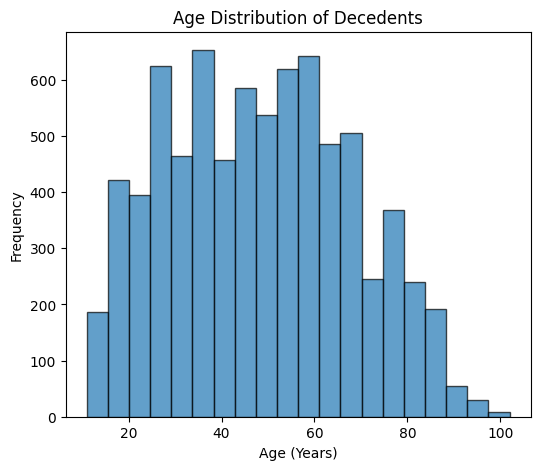

In [99]:
# a)
# Set figure size
plt.rcParams["figure.figsize"] = (6,5)

# How do you obtain a column of the decedents' ages at the time they died?
# --- YOUR CODE HERE ---
#from previous question 1.a
# g1_07a	Last known age of the deceased [years]
# g1_07b	Last known age of the deceased [months]
# g1_07c	Last known age of the deceased [days]
age_years = df['g1_07a'].astype(float)
age_months = df['g1_07b'].astype(float)
age_days = df['g1_07c'].astype(float)
age_years.fillna(0, inplace=True)
age_months.fillna(0, inplace=True)
age_days.fillna(0, inplace=True)

# --- YOUR CODE ENDS ---
total_age_in_years = age_years + age_months / 12 + age_days / 365
# Converting the column to the correct data type for plotting
age = total_age_in_years[total_age_in_years > 0]
age = age.dropna().astype(int).to_numpy()
# How do you plot the age data as a histogram?
# Hint: the matplotlib library might be useful here
# --- YOUR CODE HERE ---
plt.hist(age, bins=20, edgecolor='k', alpha=0.7)
plt.title('Age Distribution of Decedents')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()
# --- YOUR CODE ENDS ---

In [100]:
df['date_of_death'] = pd.to_datetime(df[['g1_06d', 'g1_06m', 'g1_06y']].astype(str).agg('-'.join, axis=1),
                                     errors='coerce')
months_of_death = df['date_of_death'].dt.month
month_counts = months_of_death.value_counts().sort_index()
month_counts
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
month_counts_sort = month_counts.rename({1.0: 'January', 2.0: 'February', 3.0: 'March', 4.0: 'April',
                                                    5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'August',
                                                    9.0: 'September', 10.0: 'October', 11.0: 'November',
                                                    12.0: 'December'})
ordered_month_counts = [month_counts_sort[m] for m in months]
ordered_month_counts_dict = dict(zip(months, ordered_month_counts))
ordered_month_counts_dict

{'January': 750,
 'February': 629,
 'March': 684,
 'April': 727,
 'May': 579,
 'June': 495,
 'July': 522,
 'August': 621,
 'September': 656,
 'October': 675,
 'November': 785,
 'December': 676}

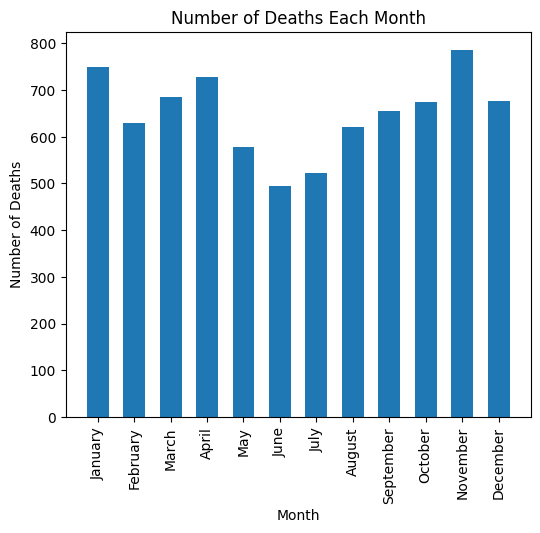

({'January': 750,
  'February': 629,
  'March': 684,
  'April': 727,
  'May': 579,
  'June': 495,
  'July': 522,
  'August': 621,
  'September': 656,
  'October': 675,
  'November': 785,
  'December': 676},
 None)

In [101]:
# b)
# Set figure size
plt.rcParams["figure.figsize"] = (6,5)

# How do you obtain a column of the months when the decedents died?
# --- YOUR CODE HERE ---
df['date_of_death'] = pd.to_datetime(df[['g1_06d', 'g1_06m', 'g1_06y']].astype(str).agg('-'.join, axis=1),
                                     errors='coerce')
months_of_death = df['date_of_death'].dt.month
#months_of_death_count = months_of_death.value_counts().sort_index()

# --- YOUR CODE ENDS ---

# How do you count the number of occurrences of each month in the above column?
# Hint: one pandas function lets you do this in one line of code
# --- YOUR CODE HERE ---
month_counts = months_of_death.value_counts().sort_index()
# --- YOUR CODE ENDS ---

# Reorder the death counts into the chronological order of the months
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
month_counts_sort = month_counts.rename({1.0: 'January', 2.0: 'February', 3.0: 'March', 4.0: 'April',
                                                    5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'August',
                                                    9.0: 'September', 10.0: 'October', 11.0: 'November',
                                                    12.0: 'December'})
ordered_month_counts = [month_counts_sort[m] for m in months]
ordered_month_counts_dict = dict(zip(months, ordered_month_counts))
ordered_month_counts_dict

# For some kinds of data, matplotlib can count and create the histogram for us
# If we've manually counted the occurrences for each category, we have to plot
# the data differently
# --- YOUR CODE HERE ---
plt.bar(x=months, height=ordered_month_counts, tick_label=months, width=0.6)
plt.xticks(rotation="vertical")
# --- YOUR CODE ENDS ---

# Remember to add a title and axis labels to your plot!
# --- YOUR CODE HERE ---
plt.title('Number of Deaths Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
ordered_month_counts_dict, plt.show()
# --- YOUR CODE ENDS ---

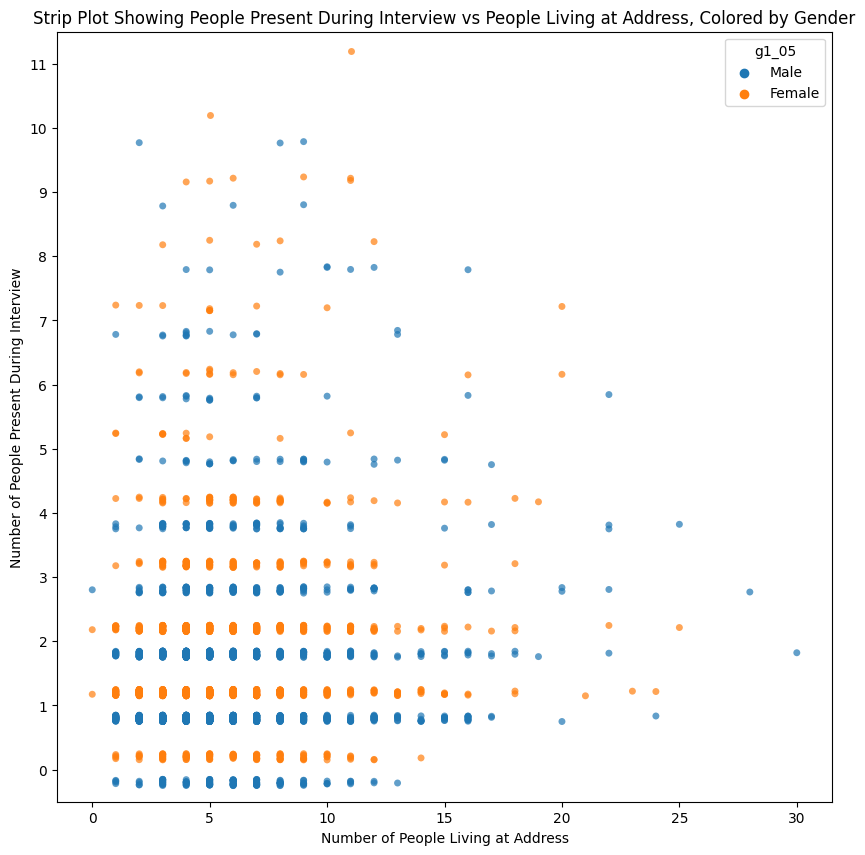

In [102]:
# c)
# Set figure size
plt.rcParams["figure.figsize"] = (10,10)

# Which columns in the dataframe do you need to create your plot?
# g1_05(sex), g5_08(no of people in interview), g4_06(no of people living at address)
# --- YOUR CODE HERE ---
col_name_sex = 'g1_05'
col_name_num_people_present_in_interview = 'g5_08'
col_name_people_living_at_address = 'g4_06'
# --- YOUR CODE ENDS ---

cols = [col_name_sex, col_name_num_people_present_in_interview, col_name_people_living_at_address]

# Remove unneeded columns from the dataset and convert the rest into
# the proper data type
df_c = df[cols].dropna()

cols = cols[1:]
for col_name in cols:
    df_c[col_name] = df_c[col_name].astype(int)

df_c = df_c.drop(df_c[df_c["g4_06"] > 50].index)

# How would you use the seaborn (sns) library to plot a strip plot?
# --- YOUR CODE HERE ---
sns.stripplot(x=col_name_people_living_at_address,
              y=col_name_num_people_present_in_interview,
              hue=col_name_sex, orient="h", data=df_c, jitter=True, dodge=True, marker='o', alpha=0.7)
# --- YOUR CODE ENDS ---
plt.xlabel('Number of People Living at Address')
plt.ylabel('Number of People Present During Interview')
plt.title('Strip Plot Showing People Present During Interview vs People Living at Address, Colored by Gender')

plt.gca().invert_yaxis()

In [103]:
# --- YOUR CODE HERE ---
asthma_col_name = 'a1_01_1'
# --- YOUR CODE ENDS ---

# Which column indicates how many cigarettes the decedent smoked per day?
# --- YOUR CODE HERE ---
num_cigs_col_name = 'a4_04'

# --- YOUR CODE ENDS ---

df_d = df.copy()

# How do you filter the dataframe to just the rows of the decedents who did not have asthma?
# --- YOUR CODE HERE ---
df_d = df[df[asthma_col_name] !='Yes']
df_d[num_cigs_col_name] = pd.to_numeric(df_d[num_cigs_col_name], errors='coerce')

# --- YOUR CODE ENDS ---

df_d[num_cigs_col_name] = df_d[num_cigs_col_name].astype(int)
df_d["pneumonia"] = df_d["gs_text34"].apply(lambda x: 1 if x=="Pneumonia" else 0)

<ipython-input-103-db0799215fcd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[num_cigs_col_name] = pd.to_numeric(df_d[num_cigs_col_name], errors='coerce')
<ipython-input-103-db0799215fcd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[num_cigs_col_name] = df_d[num_cigs_col_name].astype(int)
<ipython-input-103-db0799215fcd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [48]:
df_d[[asthma_col_name, num_cigs_col_name, "pneumonia"]].head()

,a1_01_1,a4_04,pneumonia
0,No,20,0
4,No,0,0
5,No,0,0
6,No,0,0
7,No,0,0


<ipython-input-104-57aea19fd9d0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[num_cigs_col_name] = pd.to_numeric(df_d[num_cigs_col_name], errors='coerce')
<ipython-input-104-57aea19fd9d0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[num_cigs_col_name] = df_d[num_cigs_col_name].astype(int)
<ipython-input-104-57aea19fd9d0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

(0.0, 50.0)

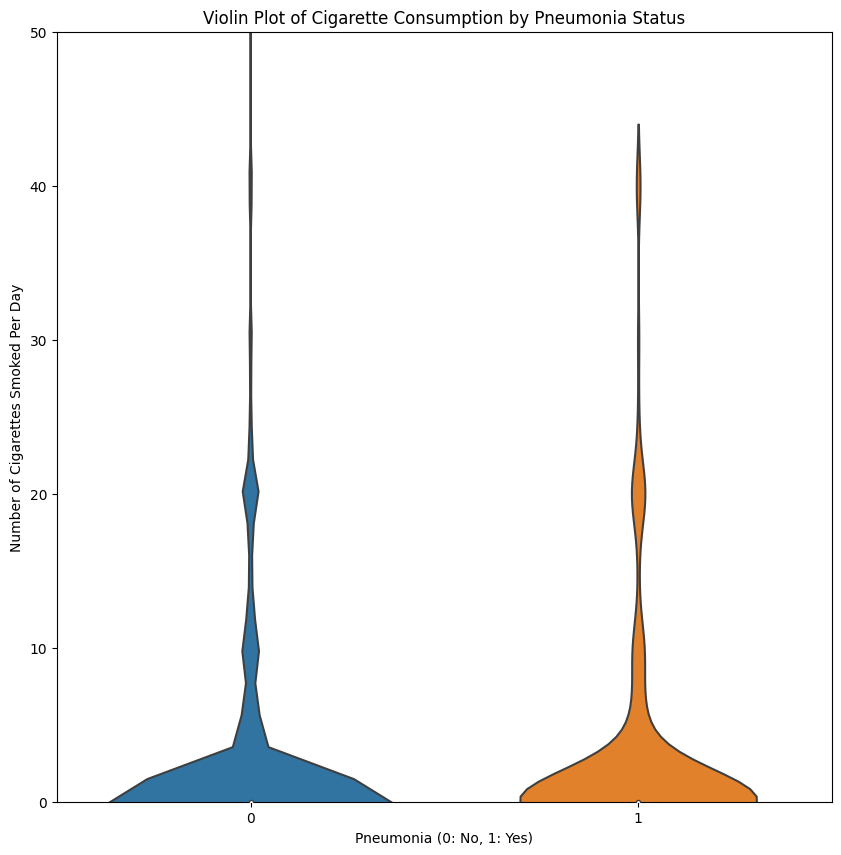

In [104]:
# d)
# Which column indicates whether the patient had asthma?
# --- YOUR CODE HERE ---
asthma_col_name = 'a1_01_1'
# --- YOUR CODE ENDS ---

# Which column indicates how many cigarettes the decedent smoked per day?
# --- YOUR CODE HERE ---
num_cigs_col_name = 'a4_04'

# --- YOUR CODE ENDS ---

df_d = df.copy()

# How do you filter the dataframe to just the rows of the decedents who did not have asthma?
# --- YOUR CODE HERE ---
df_d = df[df[asthma_col_name] !='Yes']
df_d[num_cigs_col_name] = pd.to_numeric(df_d[num_cigs_col_name], errors='coerce')

# --- YOUR CODE ENDS ---

df_d[num_cigs_col_name] = df_d[num_cigs_col_name].astype(int)
df_d["pneumonia"] = df_d["gs_text34"].apply(lambda x: 1 if x=="Pneumonia" else 0)

# The df_d dataframe now contains a column called "pneumonia" that indicates
# whether the decedent had pneumonia (1) or didn't have pneumonia (0)
# How would you use seaborn to plot on a violin plot the number of cigarettes smoked
# for both decedents who had and didn't have pneumonia?
# It should be doable in just one line
# --- YOUR CODE HERE ---
fig = sns.violinplot(x='pneumonia', y=num_cigs_col_name, data=df_d)
# --- YOUR CODE ENDS ---
plt.xlabel('Pneumonia (0: No, 1: Yes)')
plt.ylabel('Number of Cigarettes Smoked Per Day')
plt.title('Violin Plot of Cigarette Consumption by Pneumonia Status')
fig.set_ylim(0, 50)

<ipython-input-105-2479e1bc6322>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e[num_cigs_col_name] = df_e[num_cigs_col_name].astype(int)
<ipython-input-105-2479e1bc6322>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e["pneumonia"] = df_e["gs_text34"].apply(lambda x: 1 if x=="Pneumonia" else 0)


(0.0, 100.0)

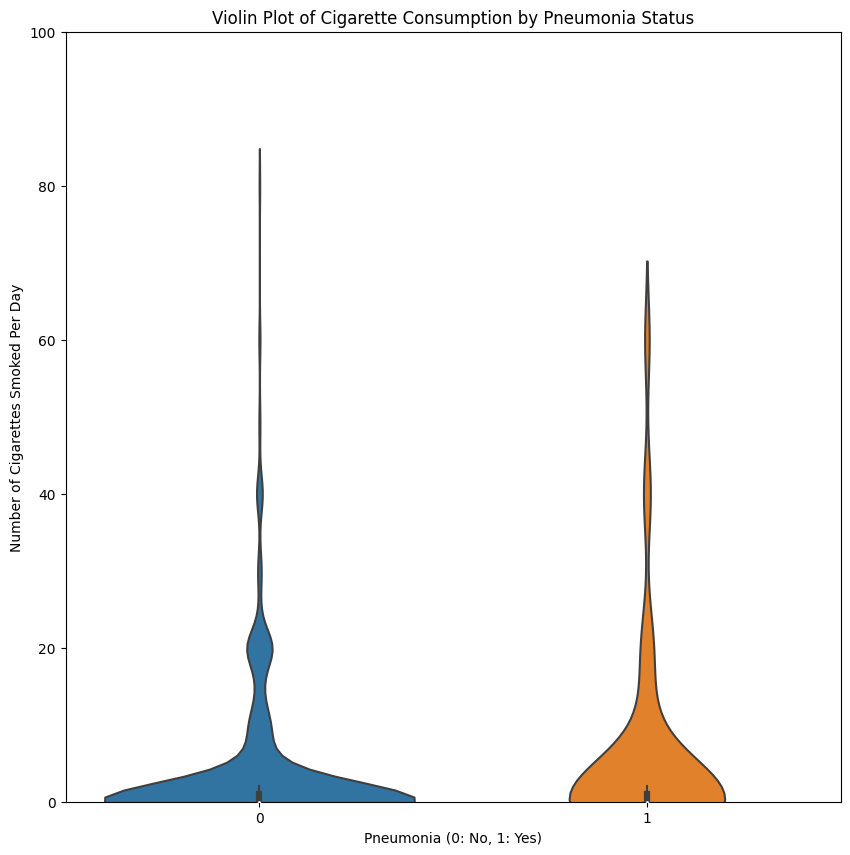

In [105]:
# e)
df_e = df.copy()
# How do you filter the dataframe into just the rows of decedents who did have asthma?
# --- YOUR CODE HERE ---
df_e = df[df[asthma_col_name] !='No']
# --- YOUR CODE ENDS ---

df_e[num_cigs_col_name] = df_e[num_cigs_col_name].astype(int)
df_e["pneumonia"] = df_e["gs_text34"].apply(lambda x: 1 if x=="Pneumonia" else 0)

# The df_e dataframe now contains a column called "pneumonia" that indicates
# whether the decedent had pneumonia (1) or didn't have pneumonia (0)
# How would you use seaborn to plot on a violin plot the number of cigarettes smoked
# for both decedents who had and didn't have pneumonia?
# It should be doable in just one line
# --- YOUR CODE HERE ---
fig = sns.violinplot(x='pneumonia', y=num_cigs_col_name, data=df_e)
# --- YOUR CODE ENDS ---
plt.xlabel('Pneumonia (0: No, 1: Yes)')
plt.ylabel('Number of Cigarettes Smoked Per Day')
plt.title('Violin Plot of Cigarette Consumption by Pneumonia Status')
fig.set_ylim(0, 100)

# Problem 3. Evaluation Metrics for Prediction Models

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


# Load and process the dataset
df = pd.read_csv("VAAdult.csv", header=0, dtype=object)
labels = df["gs_text34"]

# Drop columns that are unnecessary or that may leak information to the classifier
df = df[df.columns.drop(list(df.filter(regex='word_.*')))]

cols_to_drop = ["site", "module", "gs_text34", "gs_code34", "va34",
                "gs_code46", "gs_text46", "va46", "gs_code55", "gs_text55", "va55",
                "gs_comorbid1", "gs_comorbid2", "gs_level", "g1_01d", "g1_06d",
                "g1_07c", "g2_02", "g2_03ad", "g2_03am", "g2_03ay", 'g2_03bd',
                'g2_03bm', 'g2_03by', 'g2_03cd',
                'g2_03cm', 'g2_03cy', 'g2_03dd', 'g2_03dm', 'g2_03dy', 'g2_03ed',
                'g2_03em', 'g2_03ey', 'g2_03fd', 'g2_03fm', 'g2_03fy', "g5_01d",
                "g5_04c", 'a6_06_1d', 'a6_06_1m', 'a6_06_1y', 'a6_06_2d', 'a6_06_2m',
                'a6_06_2y', 'a6_07d', 'a6_07m', 'a6_07y', 'a6_10', 'a7_11', 'a7_12',
                'a7_13', 'a7_14', 'newid']

df = df.drop(labels=cols_to_drop, axis=1)
df = df.replace(" November", "November")
df = df.replace("Don't Know", np.nan)
df = df.replace("Refused to Answer", np.nan)


In [109]:
# Get features for the classifier from the pandas dataframe
cat_cols = ["g1_01m", "g1_05", "g1_06m", "g1_08", "g1_09", "g1_10", "g2_01",
            "g3_01", "g4_02", "g4_03a", "g4_03b", "g4_05", "g4_08", "g5_01m", "g5_02",
            "g5_03m", "g5_05", "g5_06a", "g5_07", 'a1_01_1', 'a1_01_2', 'a1_01_3',
            'a1_01_4', 'a1_01_5', 'a1_01_6', 'a1_01_7', 'a1_01_8', 'a1_01_9',
            'a1_01_10', 'a1_01_11', 'a1_01_12', 'a1_01_13', 'a1_01_14',
            "a2_02",  'a2_04', 'a2_05', 'a2_06', 'a2_07', 'a2_09_1a',
            'a2_09_1b', 'a2_09_2a', 'a2_09_2b', 'a2_10', 'a2_11', 'a2_12', 'a2_13',
            'a2_14', 'a2_16', 'a2_17', 'a2_18', 'a2_19', 'a2_20', 'a2_21', 'a2_23',
            'a2_25', 'a2_27','a2_29', 'a2_30', 'a2_31', 'a2_32','a2_34', 'a2_35',
            'a2_36','a2_38', 'a2_39_1', 'a2_39_2', 'a2_40', 'a2_42', 'a2_43',
            'a2_44', 'a2_45', 'a2_46a', 'a2_46b', 'a2_47', 'a2_49', 'a2_50', 'a2_51',
            'a2_52', 'a2_53', 'a2_55', 'a2_56', 'a2_57', 'a2_59', 'a2_60', 'a2_61',
            'a2_63_1', 'a2_63_2', 'a2_64', 'a2_66', 'a2_67', 'a2_69', 'a2_71', 'a2_72',
            'a2_74', 'a2_75', 'a2_77', 'a2_78', 'a2_80', 'a2_81', 'a2_82', 'a2_84',
            'a2_85', 'a2_87_1', 'a2_87_2', 'a2_87_3', 'a2_87_4', 'a2_87_5', 'a2_87_6',
            'a2_87_7', 'a2_87_8', 'a2_87_9', 'a2_87_10a', 'a2_87_10b', 'a3_01',
            'a3_02', 'a3_03', 'a3_04', 'a3_05', 'a3_06', 'a3_07', 'a3_09', 'a3_10',
            'a3_12', 'a3_13', 'a3_14', 'a3_15', 'a3_17', 'a3_18', 'a3_19', 'a3_20',
            'a4_01', 'a4_02_1', 'a4_02_2', 'a4_02_3', 'a4_02_4', 'a4_02_5a',
            'a4_02_5b', 'a4_02_6', 'a4_02_7', 'a4_05', 'a4_06', 'a5_01_1',
            'a5_01_2', 'a5_01_3', 'a5_01_4', 'a5_01_5', 'a5_01_6', 'a5_01_7', 'a5_01_8',
            'a5_01_9a', 'a5_02', 'a5_03', 'a6_01', 'a6_02_1', 'a6_02_2', 'a6_02_3',
            'a6_02_4', 'a6_02_5', 'a6_02_6', 'a6_02_7', 'a6_02_8', 'a6_02_9', 'a6_02_10',
            'a6_02_11', 'a6_02_12a', 'a6_02_13', 'a6_02_14', 'a6_02_15', 'a6_04', 'a6_05',
            'a6_09']

features = pd.get_dummies(df, prefix=cat_cols, columns=cat_cols, dummy_na=True)
labels = (labels == "Diabetes").astype(int)

# Some rows contain missing data. Replace those values with the most common
# repeating value in each column
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
features = imputer.fit_transform(features)


In [111]:
# Train the classifier
max_depth=10
classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
classifier.fit(features, labels)
predictions = classifier.predict(features)
predictions

array([0, 0, 0, ..., 0, 0, 0])

 Most of the predictions are 0, indicating that the majority of the samples are predicted not to have died from diabetes.

At this point, you should have available to you two lists:
- ```labels```: the ground truth labels of whether each decedent died of diabetes or not
- ```predictions```: the model's predictions of whether it thinks each decedent died of diabetes or not

Use these two lists to compute the different evaluation metric scores and include those scores in your report

In [56]:
# a)
# How would you compute the accuracy score?
# Hint: scikit-learn has a function that allows you to do this in one line
# --- YOUR CODE HERE ---
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
# --- YOUR CODE ENDS ---

Accuracy: 95.87%


This means that the model correctly predicted whether a decedent died of diabetes or not for
95.8% of the samples in the training dataset.

In [113]:
# c)
# Similarly to part (a), how would you compute the precision score?
# --- YOUR CODE HERE ---
from sklearn.metrics import precision_score
precision = precision_score(labels, predictions)
precision
# --- YOUR CODE ENDS ---

1.0

No false positive predictions

In [115]:
# e)
# How would you compute the recall score?
# --- YOUR CODE HERE ---
from sklearn.metrics import recall_score, f1_score
recall = recall_score(labels, predictions)
recall
# --- YOUR CODE ENDS ---

0.21739130434782608

The model has a relatively low ability to identify true positive cases
This means that the model correctly identified 21.0% of all actual positives (individuals who actually died of diabetes) in the training dataset.

In [60]:
# f)
# How would you compute the F1-score?
# --- YOUR CODE HERE ---
f1 = f1_score(labels, predictions)
f1
# --- YOUR CODE ENDS ---

0.3571428571428571



*   Precision = 1.0 (perfect precision, no false positives)
*   Recall = 0.217 (relatively low recall, indicating some false negatives)
*   F1 Score = 0.35 (a balance between precision and recall) - harmonic mean of precision and recall, while precision is high and recall is low. Model may be overly conservative in predicting that a decedent died of diabetes, resulting in a high number of false negative.



In [120]:
# g)
# You can rerun this block of code as many times as you'd like
# Train the classifier
max_depth = 10 # Change this!
classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
classifier.fit(features, labels)
predictions = classifier.predict(features)

# How do you compute the F1-score? (you can copy your answer to part (f) here)
# --- YOUR CODE HERE ---
f1 = f1_score(labels, predictions)

# Print the F1-score
print("F1-score:", f1)
# --- YOUR CODE ENDS ---

F1-score: 0.3571428571428571


In [121]:
# g)
# You can rerun this block of code as many times as you'd like
# Train the classifier
max_depth = 15 # Change this!
classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
classifier.fit(features, labels)
predictions = classifier.predict(features)

# How do you compute the F1-score? (you can copy your answer to part (f) here)
# --- YOUR CODE HERE ---
f1 = f1_score(labels, predictions)

# Print the F1-score
print("F1-score:", f1)
# --- YOUR CODE ENDS ---

F1-score: 0.7102803738317757
